In [2]:
%run undistort
import matplotlib.pyplot as plt

objpoints, imgpoints = prepare_obj_img_points()

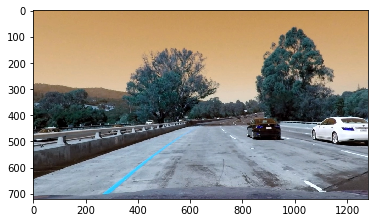

In [3]:
%matplotlib inline
img = cv2.imread('test_images/test1.jpg')
undistorted = cal_undistort(img, objpoints, imgpoints)
plt.imshow(undistorted)

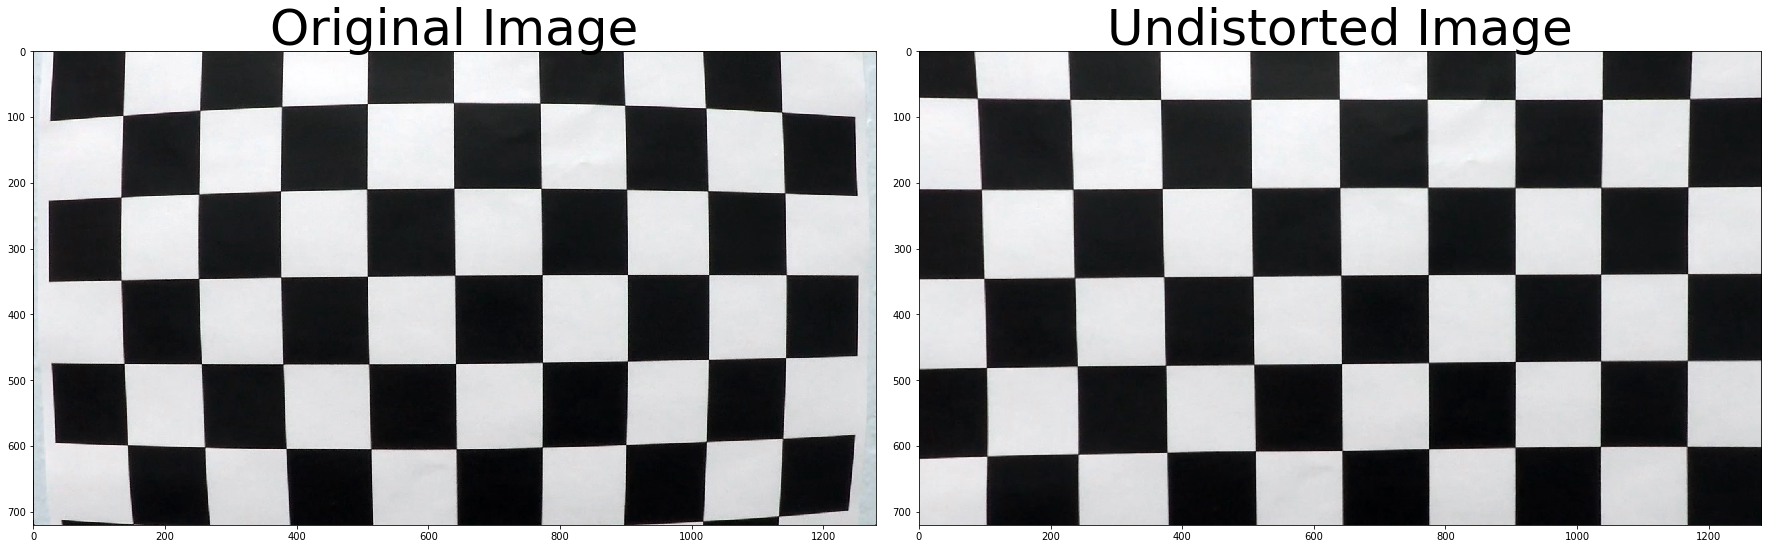

In [4]:
img = cv2.imread('camera_cal/calibration1.jpg')

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

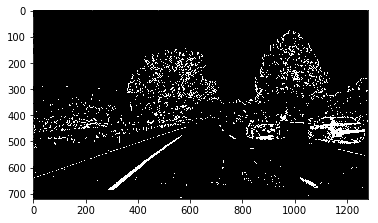

In [8]:
%run color_and_gradient_threshed
%matplotlib inline
img = cv2.imread('test_images/test1.jpg')
binary_img = threshed_binary_pipeline(img, s_thresh=(170, 255), sx_thresh=(30, 100))
plt.imshow(binary_img, cmap='gray')

<Figure size 432x288 with 0 Axes>

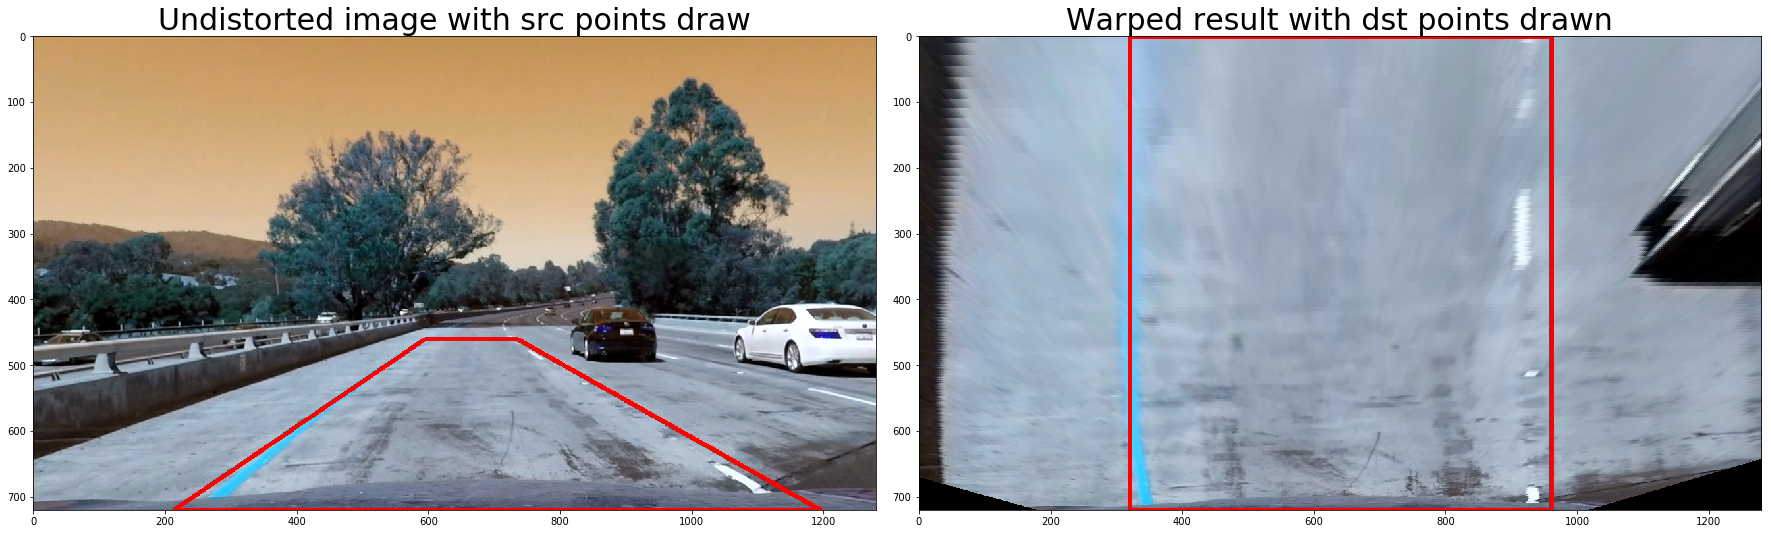

In [38]:
%run perspective_transform

img = cv2.imread('test_images/test1.jpg')
undistorted = cal_undistort(img, objpoints, imgpoints)
img_size = (undistorted.shape[1], undistorted.shape[0])
src = np.float32(
    [[(img_size[0] / 2) - 45, img_size[1] / 2 + 100],
    [((img_size[0] / 6)), img_size[1]],
    [(img_size[0] * 5 / 6) + 130, img_size[1]],
    [(img_size[0] / 2 + 95), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
transformed = warper(undistorted, src, dst)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(with_points_drawn(undistorted, src))
ax1.set_title('Undistorted image with src points draw', fontsize=30)
ax2.imshow(with_points_drawn(transformed, dst))
ax2.set_title('Warped result with dst points drawn', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)